In [81]:
from moexalgo import Market, Ticker
import numpy as np
import matplotlib.pyplot as plt

In [82]:
# Акции SBER
sber = Ticker('SBER')

# Все акции
stocks = Market('stocks')

In [83]:
candles = sber.candles(date='2020-01-10', till_date='2023-12-05', period='D')

In [84]:
def add_simple_moving_average(df, close_col, period):
    """
    Добавляет колонку с простой скользящей средней в датафрейм.

    Args:
        df: Датафрейм.
        close_col: Название колонки с ценой закрытия.
        period: Период скользящей средней.

    Returns:
        Датафрейм с добавленной колонкой.
    """

    close = df[close_col]
    close_sma = close.rolling(window=period).mean()
    df["SMA_" + str(period)] = close_sma
    return df

In [85]:
df = add_simple_moving_average(candles, "close", 5)
df

,open,close,high,low,value,volume,begin,end,SMA_5
0,257.86,258.19,259.25,256.88,4.864405e+09,18851390.0,2020-01-10,2020-01-10 23:59:59,NaN
1,258.30,262.40,262.40,257.15,6.719256e+09,25855010.0,2020-01-13,2020-01-13 23:59:59,NaN
2,262.50,259.05,263.22,258.62,8.103826e+09,31125740.0,2020-01-14,2020-01-14 23:59:59,NaN
3,258.49,256.31,258.91,254.21,1.266174e+10,49361790.0,2020-01-15,2020-01-15 23:59:59,NaN
4,257.11,257.51,259.51,256.10,1.036767e+10,40246770.0,2020-01-16,2020-01-16 23:59:59,258.692
...,...,...,...,...,...,...,...,...,...
966,279.36,276.80,280.56,276.20,8.285652e+09,29820830.0,2023-11-29,2023-11-29 23:59:59,282.416
967,276.70,277.50,278.65,272.75,1.539141e+10,55873540.0,2023-11-30,2023-11-30 23:59:59,280.678
968,277.00,273.97,277.98,273.55,8.726777e+09,31660970.0,2023-12-01,2023-12-01 23:59:59,278.102
969,273.60,270.96,274.95,270.52,1.027482e+10,37700740.0,2023-12-04,2023-12-04 23:59:59,275.828


In [86]:
def add_crossover_indicator(df, close_col, sma_col):
    """
    Добавляет колонку с индикатором пересечения скользящих средних.

    Args:
        df: Датафрейм.
        close_col: Название колонки с ценой закрытия.
        sma_col: Название колонки со скользящей средней.

    Returns:
        Датафрейм с добавленной колонкой.
    """

    df["Crossover"] = np.where(
        df[sma_col].diff(1) > 0,
        1,
        0
    )
    return df

In [87]:
df = add_crossover_indicator(df, "сlose", "SMA_5")
df.tail(50)

,open,close,high,low,value,volume,begin,end,SMA_5,Crossover
921,256.20,256.10,257.85,254.63,7.148790e+09,27880630.0,2023-09-27,2023-09-27 23:59:59,253.354,1
922,256.40,257.67,258.25,255.50,6.771651e+09,26331160.0,2023-09-28,2023-09-28 23:59:59,254.856,1
923,258.00,260.72,262.59,256.71,1.787062e+10,68533310.0,2023-09-29,2023-09-29 23:59:59,256.602,1
924,261.37,258.98,261.92,257.03,9.234132e+09,35574470.0,2023-10-02,2023-10-02 23:59:59,257.868,1
925,258.99,259.65,260.50,257.23,6.193849e+09,23911430.0,2023-10-03,2023-10-03 23:59:59,258.624,1
926,259.00,259.53,260.39,258.24,4.816207e+09,18571620.0,2023-10-04,2023-10-04 23:59:59,259.310,1
927,260.70,259.38,261.39,258.26,6.111705e+09,23501620.0,2023-10-05,2023-10-05 23:59:59,259.652,1
928,259.77,262.93,263.40,257.86,8.338547e+09,32001280.0,2023-10-06,2023-10-06 23:59:59,260.094,1
929,263.00,265.25,265.97,263.00,1.203676e+10,45447720.0,2023-10-09,2023-10-09 23:59:59,261.348,1
930,264.89,263.00,265.18,257.00,8.962447e+09,34001290.0,2023-10-10,2023-10-10 23:59:59,262.018,1


In [88]:
def add_profit_on_buy_indicator(df, crossover_col):
    """
    Добавляет колонку с индикатором прибыли на покупку.

    Args:
        df: Датафрейм.
        crossover_col: Название колонки с индикатором пересечения скользящих средних.

    Returns:
        Датафрейм с добавленной колонкой.
    """

    df["Profit_On_Buy"] = np.where(
        df[crossover_col].shift(1) == 1,
        df["close"] - df["open"],
        0
    )
    return df

In [89]:
df = add_profit_on_buy_indicator(df, "Crossover")
df.tail(100)

,open,close,high,low,value,volume,begin,end,SMA_5,Crossover,Profit_On_Buy
871,247.25,245.85,248.10,245.00,7.752931e+09,31451760.0,2023-07-19,2023-07-19 23:59:59,246.130,0,0.0
872,246.27,242.70,246.27,242.15,8.801179e+09,36027010.0,2023-07-20,2023-07-20 23:59:59,245.432,0,0.0
873,243.18,244.13,244.53,241.70,7.857419e+09,32271770.0,2023-07-21,2023-07-21 23:59:59,244.968,0,0.0
874,244.00,244.87,245.85,243.52,4.841186e+09,19769440.0,2023-07-24,2023-07-24 23:59:59,244.864,0,0.0
875,245.48,247.20,247.77,244.81,9.802524e+09,39733390.0,2023-07-25,2023-07-25 23:59:59,244.950,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
966,279.36,276.80,280.56,276.20,8.285652e+09,29820830.0,2023-11-29,2023-11-29 23:59:59,282.416,0,0.0
967,276.70,277.50,278.65,272.75,1.539141e+10,55873540.0,2023-11-30,2023-11-30 23:59:59,280.678,0,0.0
968,277.00,273.97,277.98,273.55,8.726777e+09,31660970.0,2023-12-01,2023-12-01 23:59:59,278.102,0,0.0
969,273.60,270.96,274.95,270.52,1.027482e+10,37700740.0,2023-12-04,2023-12-04 23:59:59,275.828,0,0.0


In [90]:
def add_buy_signal(df, col):
    """
    Добавляет колонку с сигналом на покупку 1 - покупка, 0 - нет

    """

    df["Buy_Signal"] = np.where(
        df[col].shift(1) == 1,
        1,
        0
    )
    return df

In [91]:
df = add_buy_signal(df, "Crossover")
df.tail(20)

,open,close,high,low,value,volume,begin,end,SMA_5,Crossover,Profit_On_Buy,Buy_Signal
951,273.64,278.15,278.35,273.28,1.605863e+10,58032670.0,2023-11-08,2023-11-08 23:59:59,272.496,1,4.51,1
952,278.60,276.65,278.85,276.02,7.882378e+09,28430630.0,2023-11-09,2023-11-09 23:59:59,274.014,1,-1.95,1
953,276.99,280.19,281.30,276.60,1.248637e+10,44643290.0,2023-11-10,2023-11-10 23:59:59,276.344,1,3.20,1
954,280.40,283.97,284.80,280.32,1.298757e+10,45887770.0,2023-11-13,2023-11-13 23:59:59,278.454,1,3.57,1
955,283.70,280.87,283.88,280.54,1.142087e+10,40484810.0,2023-11-14,2023-11-14 23:59:59,279.966,1,-2.83,1
956,280.87,282.89,283.93,278.51,1.175952e+10,41837690.0,2023-11-15,2023-11-15 23:59:59,280.914,1,2.02,1
957,282.40,279.70,283.69,279.56,6.960894e+09,24696600.0,2023-11-16,2023-11-16 23:59:59,281.524,1,-2.70,1
958,279.70,281.60,282.50,278.66,8.802031e+09,31322320.0,2023-11-17,2023-11-17 23:59:59,281.806,1,1.90,1
959,281.96,282.91,284.20,281.61,7.159260e+09,25291010.0,2023-11-20,2023-11-20 23:59:59,281.594,0,0.95,1
960,282.30,282.79,283.82,281.66,5.398750e+09,19099390.0,2023-11-21,2023-11-21 23:59:59,281.978,1,0.00,0


In [92]:
import datetime as dt
def get_action(time: str):
    buy = False
    sell = False
    result = df['Buy_Signal'][len(df)-1]    
    if time=='10:00:00':
        # at start
        buy = True
    elif time == str(df['end'][len(df)-1].time()):
        # at the end
        sell = True
    return (result, buy, sell)
    

In [93]:
df['end'][970].time()

datetime.time(23, 59, 59)

In [94]:
get_action('23:59:59')
get_action('10:00:00')


(0, True, False)

In [95]:
df['Profit_On_Buy'].sum()

111.26999999999977

In [96]:
def add_current_money_indicator(df, initial_money, profit_on_buy_col):
    """
    Добавляет колонку с текущей суммой денег.

    Args:
        df: Датафрейм.
        initial_money: Начальная сумма денег.
        profit_on_buy_col: Название колонки с индикатором прибыли на покупку.

    Returns:
        Датафрейм с добавленной колонкой.
    """
    #df['Profit_On_Buy'] = df['Profit_On_Buy'].fillna(0)
    df["Current_Money"] = initial_money
    for i in range(1, len(df)):
        df.loc[i, "Current_Money"] = df.loc[i-1, "Current_Money"] + df.loc[i, profit_on_buy_col]
    return df

In [97]:
df = add_current_money_indicator(df, 1000, "Profit_On_Buy")
df[:-50]

,open,close,high,low,value,volume,begin,end,SMA_5,Crossover,Profit_On_Buy,Buy_Signal,Current_Money
0,257.86,258.19,259.25,256.88,4.864405e+09,18851390.0,2020-01-10,2020-01-10 23:59:59,NaN,0,0.0,0,1000.00
1,258.30,262.40,262.40,257.15,6.719256e+09,25855010.0,2020-01-13,2020-01-13 23:59:59,NaN,0,0.0,0,1000.00
2,262.50,259.05,263.22,258.62,8.103826e+09,31125740.0,2020-01-14,2020-01-14 23:59:59,NaN,0,0.0,0,1000.00
3,258.49,256.31,258.91,254.21,1.266174e+10,49361790.0,2020-01-15,2020-01-15 23:59:59,NaN,0,0.0,0,1000.00
4,257.11,257.51,259.51,256.10,1.036767e+10,40246770.0,2020-01-16,2020-01-16 23:59:59,258.692,0,0.0,0,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,252.80,253.77,255.47,249.82,1.691662e+10,66831270.0,2023-09-20,2023-09-20 23:59:59,257.278,0,0.0,0,1093.74
917,252.87,250.16,254.20,249.81,1.479503e+10,58913730.0,2023-09-21,2023-09-21 23:59:59,255.310,0,0.0,0,1093.74
918,249.85,251.99,253.10,248.62,1.024337e+10,40714900.0,2023-09-22,2023-09-22 23:59:59,253.542,0,0.0,0,1093.74
919,252.00,252.65,253.49,249.83,8.008925e+09,31863690.0,2023-09-25,2023-09-25 23:59:59,252.258,0,0.0,0,1093.74


In [98]:
df['Profit_On_Buy'].describe()

count    971.000000
mean       0.114593
std        2.804254
min      -16.710000
25%       -0.170000
50%        0.000000
75%        0.165000
max       16.420000
Name: Profit_On_Buy, dtype: float64

In [99]:
def plot_linear_graph_of_profit_on_buy_change(df, col):
    """
    Построение графика линейного по изменению суммы Profit_On_Buy.

    Args:
        df: Датафрейм.
        profit_on_buy_col: Название колонки с индикатором прибыли на покупку.

    Returns:
        Нет.
    """
    plt.plot(df["begin"], df[col])
    plt.title("График линейный по изменению суммы денег")
    plt.show()

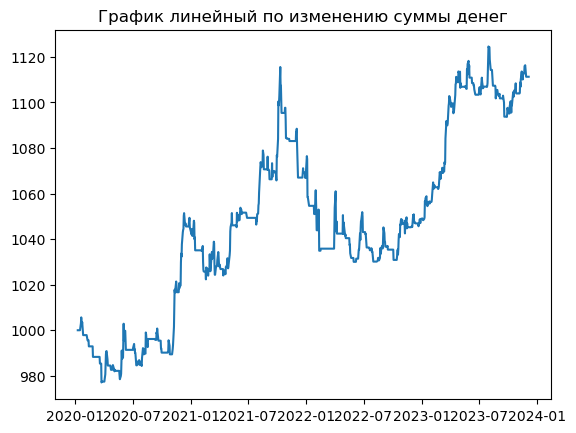

In [100]:
plot_linear_graph_of_profit_on_buy_change(df, "Current_Money")

In [111]:
df.loc[len(df)-20:len(df)-1]

,open,close,high,low,value,volume,begin,end,SMA_5,Crossover,Profit_On_Buy,Buy_Signal,Current_Money
951,273.64,278.15,278.35,273.28,1.605863e+10,58032670.0,2023-11-08,2023-11-08 23:59:59,272.496,1,4.51,1,1108.75
952,278.60,276.65,278.85,276.02,7.882378e+09,28430630.0,2023-11-09,2023-11-09 23:59:59,274.014,1,-1.95,1,1106.80
953,276.99,280.19,281.30,276.60,1.248637e+10,44643290.0,2023-11-10,2023-11-10 23:59:59,276.344,1,3.20,1,1110.00
954,280.40,283.97,284.80,280.32,1.298757e+10,45887770.0,2023-11-13,2023-11-13 23:59:59,278.454,1,3.57,1,1113.57
955,283.70,280.87,283.88,280.54,1.142087e+10,40484810.0,2023-11-14,2023-11-14 23:59:59,279.966,1,-2.83,1,1110.74
956,280.87,282.89,283.93,278.51,1.175952e+10,41837690.0,2023-11-15,2023-11-15 23:59:59,280.914,1,2.02,1,1112.76
957,282.40,279.70,283.69,279.56,6.960894e+09,24696600.0,2023-11-16,2023-11-16 23:59:59,281.524,1,-2.70,1,1110.06
958,279.70,281.60,282.50,278.66,8.802031e+09,31322320.0,2023-11-17,2023-11-17 23:59:59,281.806,1,1.90,1,1111.96
959,281.96,282.91,284.20,281.61,7.159260e+09,25291010.0,2023-11-20,2023-11-20 23:59:59,281.594,0,0.95,1,1112.91
960,282.30,282.79,283.82,281.66,5.398750e+09,19099390.0,2023-11-21,2023-11-21 23:59:59,281.978,1,0.00,0,1112.91


In [108]:
df.index

RangeIndex(start=0, stop=971, step=1)